# PUI 2017 HW 11-2
## Yuwen Chang (ywc249)

### Objective
- Optimize k-means clustering

In [1]:
import time
import numpy as np
import pylab as pl
from IPython.display import display, clear_output

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
np.random.seed(333)

In [3]:
random_1 = np.random.randn(2,100)
random_2 = np.random.randn(2,100) + 2
random_1.shape, random_2.shape

((2, 100), (2, 100))

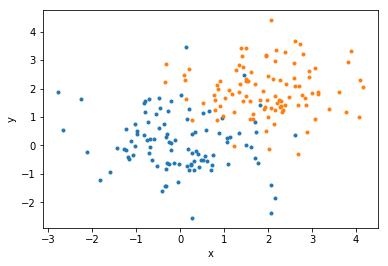

In [4]:
pl.plot(random_1[0], random_1[1], '.')
pl.plot(random_2[0], random_2[1], '.')
pl.xlabel('x')
pl.ylabel('y');

# 1. Choose the number of clusters = 2

In [5]:
random_stack = np.hstack([random_1, random_2])

# 2. Set a guess for the initial centers

In [6]:
# fix the centers to a poor initial guess
centers = np.array([[0,-1], [0,-2]]) 

# a better initial guess would have been
# minval, maxval = min(random_stack[0]), max(random_stack[0])
# np.array((np.random.rand(4)   * (maxval - minval)) + minval).reshape(2,2)

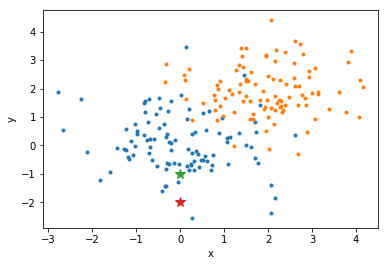

In [7]:
pl.plot(random_1[0], random_1[1], '.')
pl.plot(random_2[0], random_2[1], '.')
pl.plot(centers[0,0], centers[0,1], '*', ms=10)
pl.plot(centers[1,0], centers[1,1], '*', ms=10)
pl.xlabel('x')
pl.ylabel('y');

# 3. Check the closer center for each point

In [8]:
#define the distance metric - just Eucledian distance
def distmetric(x, y, center):
    distmetric = np.sqrt((x - center[0])**2 + (y - center[1])**2)
    return distmetric

In [9]:
cl1 = distmetric(random_1[0], random_1[1], centers[0]) < distmetric(random_1[0], random_1[1], centers[1])
cl2 = distmetric(random_2[0], random_2[1], centers[0]) < distmetric(random_2[0], random_2[1], centers[1])

cl1

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,  True], dtype=bool)

# 4. Calculate new centers

In [10]:
newc = np.array([np.hstack([random_1[:, cl1], random_2[:, cl2]]).mean(axis=1),
                 np.hstack([random_1[:, ~cl1], random_2[:, ~cl2]]).mean(axis=1)])
print("old center\n", centers,
      "\nnew center\n", newc)

('old center\n', array([[ 0, -1],
       [ 0, -2]]), '\nnew center\n', array([[ 0.96972306,  1.06522176],
       [ 1.02400655, -2.10176012]]))


# 5. Iterate 3 & 4 until convergence

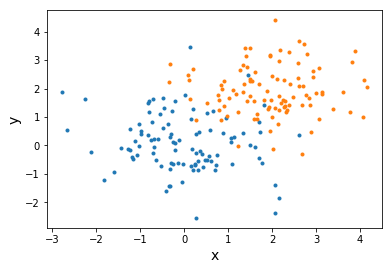

In [11]:
fig, ax = pl.subplots()

# plot data with labels
d1, = ax.plot(random_1[0], random_1[1], '.')
d2, = ax.plot(random_2[0], random_2[1], '.')

# plot centers
c1, = ax.plot([],[], '*', markersize=12)
c2, = ax.plot([],[], '*', markersize=12)

ax.set_xlabel('x', fontsize=14)
ax.set_ylabel('y', fontsize=14)
pl.show()

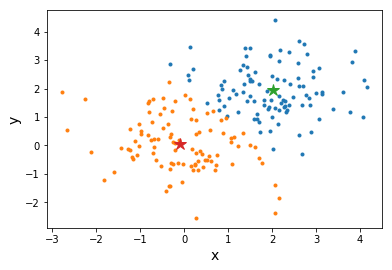

iteration: 8
old center:
[[ 2.01522567  1.93589473]
 [-0.09470755  0.04900058]]
new center:
[[ 2.01522567  1.93589473]
 [-0.09470755  0.04900058]]


In [12]:
# create iterate term
att = 0

# run the loop until center convergence or too many loops
while((centers != newc).all()) and att < 100:
    
    # initialize data for first attempt
    if att == 0:
        c1.set_data(centers[0,0], centers[0,1])
        c2.set_data(centers[1,0], centers[1,1])
        display(fig)
        print('attempt: %s'%att)
        print('center: %s'%centers)

    # plot data points
    tmp1 = np.hstack([random_1[:, cl1], random_2[:, cl2]])
    tmp2 = np.hstack([random_1[:, ~cl1], random_2[:, ~cl2]])
    d1.set_data(tmp1[0], tmp1[1])
    d2.set_data(tmp2[0], tmp2[1])    
    
    # assign new centers
    centers = newc
    cl1 = distmetric(random_1[0], random_1[1], centers[0]) < distmetric(random_1[0], random_1[1], centers[1])
    cl2 = distmetric(random_2[0], random_2[1], centers[0]) < distmetric(random_2[0], random_2[1], centers[1])

    # calculate new centers
    newc = np.array([np.hstack([random_1[:, cl1], random_2[:, cl2]]).mean(axis=1), 
                     np.hstack([random_1[:, ~cl1], random_2[:, ~cl2]]).mean(axis=1)])

    c1.set_data(centers[0,0], centers[0,1])
    c2.set_data(centers[1,0], centers[1,1])

    # plot animate subplot
    time.sleep(1)
    clear_output(wait=True)
    display(fig)
    
    # iterate # of attempts
    att += 1
    
    print('iteration: %s'%att)
    print('old center:\n%s'%centers)
    print('new center:\n%s'%newc)

## ASH Score 100